<a href="https://colab.research.google.com/github/RickOti23/Python/blob/main/Football_analytics_first_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U mplsoccer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 1.1 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplsoccer as mp
from mplsoccer import add_image
from IPython.display import display
from PIL import Image
import io
image_path  = "/content/images (2).jpg"
# image_path2 = "/content/mancity logo.png"
img = Image.open(image_path)
# imm2 = Image.open(image_path2)
# img = np.array(img)
background_color='black'
df =pd.read_csv("/content/erling_haaland_2022_understat (2).csv")
# df.head()
# display(img)


In [3]:
min = df["minute"].sum()
total_shots = df.shape[0]
goals = df["result"].value_counts()["Goal"]
total_xG = round(df["xG"].sum(),0)
average_xG_per_shot = round(total_xG/total_shots,2)
average_xG_per_shot


0.27

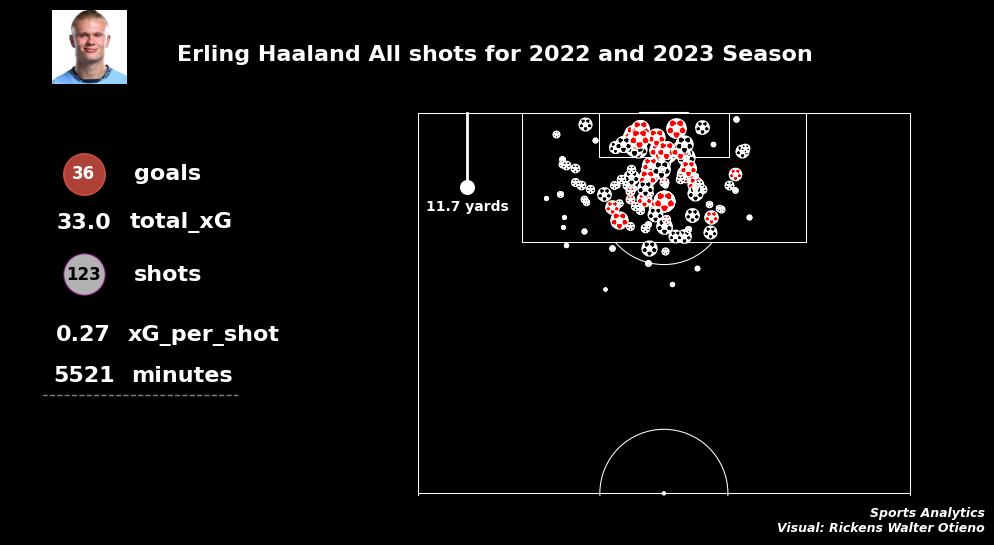

In [4]:
df['X'] = df['X'] * 100
df['Y'] = df['Y'] * 100

pitch = mp.VerticalPitch(
    pitch_type='opta',
    half=True,
    pitch_color=background_color,
    pad_bottom=.5,
    line_color='white',
    linewidth=.75,
    axis=False,
    label=True
)

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5),gridspec_kw={"width_ratios":[1,2]})
fig.set_facecolor(background_color)

# Draw the pitch on the second axis (ax[1])
pitch.draw(ax=ax[1])
ax[1].set_facecolor(background_color)

# Scatter plot on the second axis (ax[1])
for x in df.to_dict(orient="records"):
    pitch.scatter(
        ax=ax[1],
        x=x["X"],
        y=x["Y"],
        s=x["xG"] * 300,
        c="red" if x["result"] == "Goal" else background_color,
        edgecolors="white",
        linewidths=.8,
        marker="football"
    )

# Add a line and text on ax[1] for average distance
ax[1].scatter(
    x=90,
    y=df['X'].mean(),
    s=100,
    color='white',
    linewidth=.8
)
ax[1].plot(
    [90, 90],
    [100, df['X'].mean()],
    color='white',
    linewidth=2
)
ax[1].text(
    x=90,
    y=df['X'].mean() - 3,
    s="11.7 yards",
    color="white",
    ha="center",
    fontweight="bold"
)

# Plot on ax[0] with scatter plot
ax[0].set_facecolor(background_color)
ax[0].set_xlim(0, 1)
ax[0].set_ylim(0, 1)
ax[0].scatter(
    x=0.15,
    y=0.8,
    s=900,
    color="#F95F50",
    alpha=0.7
)

ax[0].text(
    x=0.15,
    y=0.8,
    s=goals,
    va="center",
    ha="center",
    color="white",
    fontweight="bold",
    fontsize=12
)

ax[0].text(
    x=0.45,
    y=0.8,
    s="goals",
    va="center",
    ha="center",
    color="white",
    fontweight="bold",
    fontsize=16
)
ax[0].text(
    x=0.15,
    y=0.68,
    s=total_xG,
    va="center",
    ha="center",
    color="white",
    fontweight="bold",
    fontsize=16
)

ax[0].text(
    x=0.5,
    y=0.68,
    s="total_xG",
    va="center",
    ha="center",
    color="white",
    fontweight="bold",
    fontsize=16
)

ax[0].scatter(
    x=0.15,
    y=0.55,
    s=900,
    color="white",
    edgecolor="purple",
    linewidth=1,
    alpha=0.7
)

ax[0].text(
    x=0.15,
    y=0.55,
    s=total_shots,
    color="black",
    ha="center",
    va="center",
    fontsize=12,
    fontweight="bold"
)

ax[0].text(
    x=0.45,
    y=0.55,
    s="shots",
    color="white",
    ha="center",
    va="center",
    fontsize=16,
    fontweight="bold"
)

ax[0].text(
    x=0.15,
    y=0.4,
    s=average_xG_per_shot,
    color="white",
    ha="center",
    va="center",
    fontsize=16,
    fontweight="bold"
)

ax[0].text(
    x=0.58,
    y=0.4,
    s="xG_per_shot",
    color="white",
    ha="center",
    va="center",
    fontsize=16,
    fontweight="bold"
)

ax[0].text(
    x=0.15,
    y=0.3,
    s=min,
    color="white",
    ha="center",
    va="center",
    fontsize=16,
    fontweight="bold"
)

ax[0].text(
    x=0.5,
    y=0.3,
    s="minutes",
    color="white",
    ha="center",
    va="center",
    fontsize=16,
    fontweight="bold"
)

ax[0].plot(
    [0,0.7],
    [0.25,0.25],
    color="grey",
    linewidth=1,
    linestyle="--"
)
# Add credits at the bottom
CREDIT_1 = "Sports Analytics"
CREDIT_2 = "Visual: Rickens Walter Otieno"
fig.text(
    0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9, color="white",
    ha="right", fontweight="bold", fontstyle='italic'
)

fig.suptitle("Erling Haaland All shots for 2022 and 2023 Season", color="white", fontweight="bold", fontsize=16)
fig = add_image(
    img,
    fig,  # figure
    0.02, 0.9,  # left and bottom dimensions
    0.15, 0.15  # further increased size (larger image)
)

plt.axis('off')

# Adjust layout for better fit
plt.tight_layout()

# Show plot
plt.show()